In [2]:
# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
%matplotlib inline
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import re
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTETomek

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

smt = SMOTETomek(sampling_strategy='auto')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
#Dataset reading with Pandas
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
# df=df[df["Clothing ID"]==1078]
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
#Droping "Unmaned: 0" column
df=df.drop(labels=['Unnamed: 0'], axis=1)

In [5]:
#Checking column names
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
#Checking Dataframe information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [7]:
#Checking null values
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
#Droping rows based on "Review Text" column null values
df = df[df['Review Text'].notna()]
df


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [9]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [10]:
#Checking dataframe shape
df.shape

(22641, 10)

# **EDA (Expolratory Data Analysis)**

Text(0.5, 1.0, 'Age Distribution in Data')

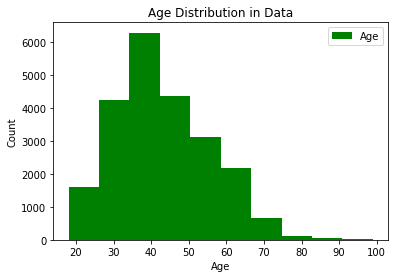

In [11]:
# The age distribution in data
plt.hist(df['Age'], color="green", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Data")

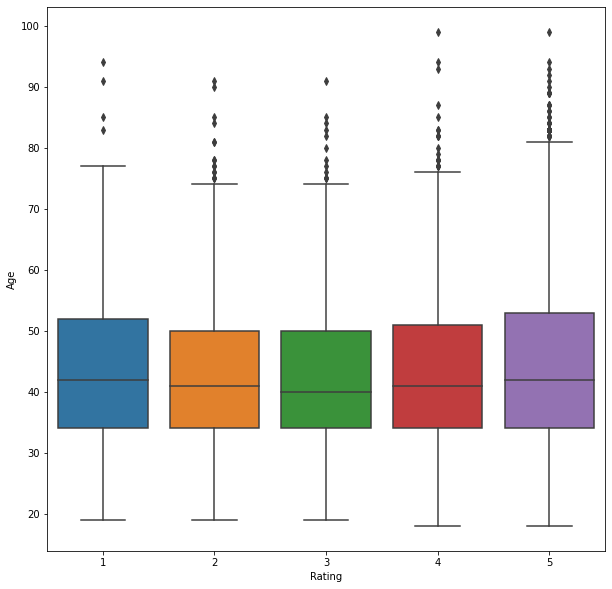

In [12]:
#Ratings based on Age
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y = 'Age', data = df)

Text(0.5, 1.0, 'Distribution of Rating')

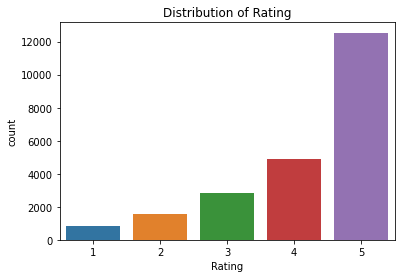

In [13]:
# Ratings Distribution in Dataset
sns.countplot(x='Rating',data=df)
plt.title("Distribution of Rating")

In [14]:
# Finding the Review text length and creating new column as "Review Length"
df["Title"]=df["Title"].fillna(" ")
df['Review Text']=df["Title"]+" "+df["Review Text"]
df['Review Length'] = df['Review Text'].astype(str).apply(len)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


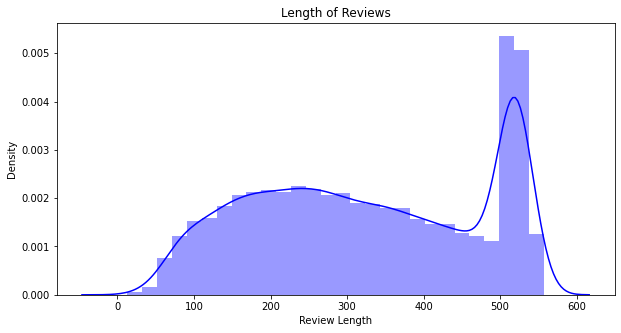

In [15]:
#Review text length distribution
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(df['Review Length'], color="blue")
ax = plt.title("Length of Reviews")

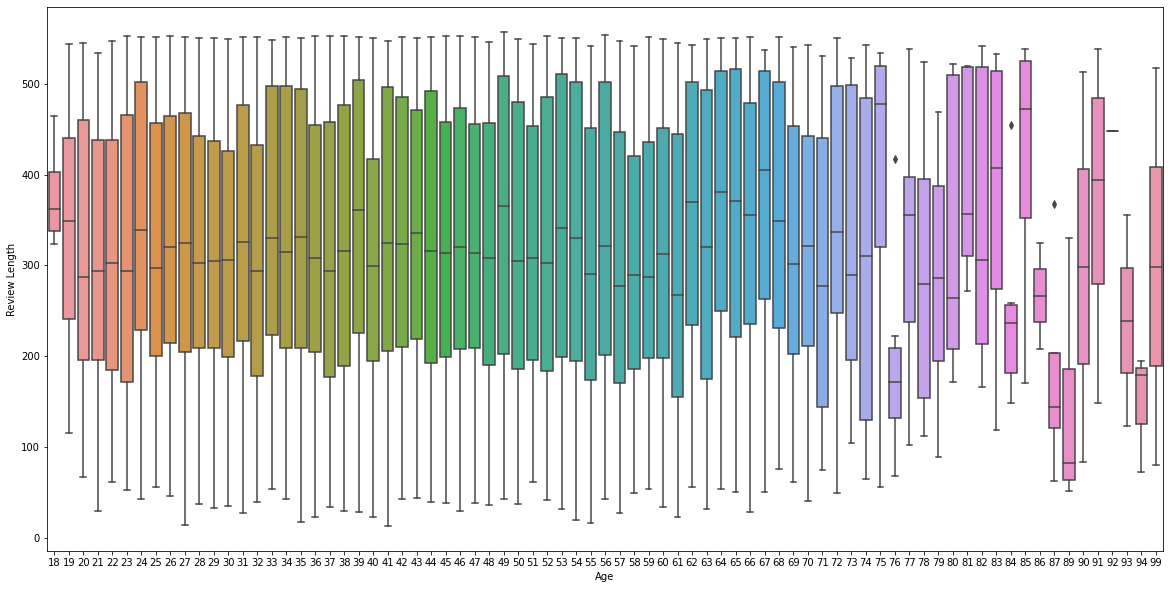

In [16]:
#Review length with respect to Age
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Age', y = 'Review Length', data = df)

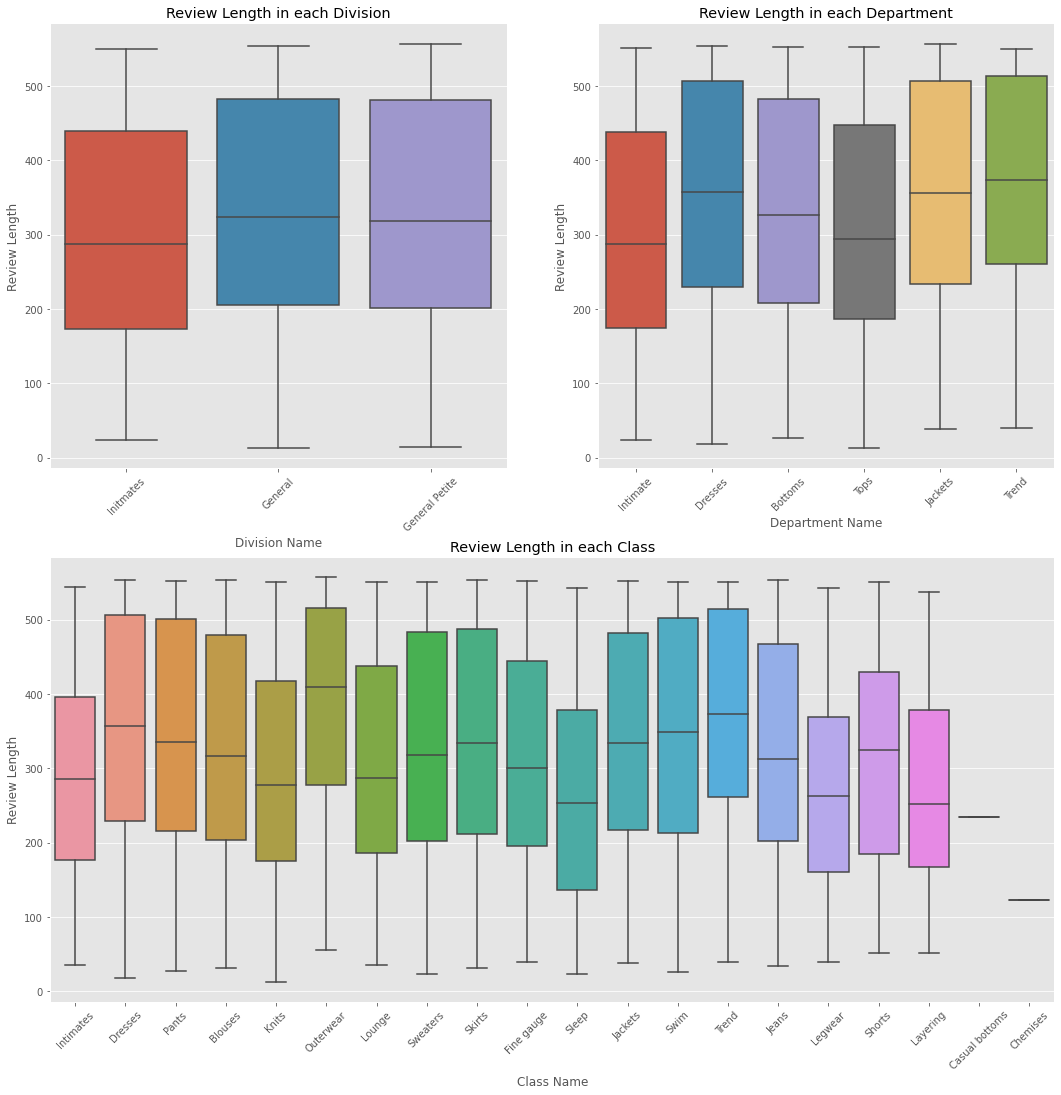

In [17]:
#Review Length in each Division

plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.boxplot(x = 'Division Name', y = 'Review Length', data = df)
ax1 = plt.title("Review Length in each Division")
#Review Length in each Department
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.boxplot(x = 'Department Name', y = 'Review Length', data = df)
ax2 = plt.title("Review Length in each Department")
#Review Length in each Class
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x = 'Class Name', y = 'Review Length', data = df)
ax3 = plt.title("Review Length in each Class")

# **Review Analysis**

In [18]:
#PorterStemmer is using for Stemming for "Review Text" column
ps = PorterStemmer()
Reviews = df['Review Text'].astype(str)
print(Reviews.shape)
Reviews[Reviews.isnull()] = "NULL"

(22641,)


In [19]:
# Cleaning data
#Which includes removing special characters and English Stopwords
tokenizer = RegexpTokenizer(r'[a-zA-Z]{3,}')
stop_words = set(stopwords.words('english'))
def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    return words


In [20]:
df['tokenized'] = df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row

In [21]:
#Converting list of tokens into string with new column name "tokenized_unlist"
def string_unlist(strlist):
    return " ".join(strlist)

df["tokenized_unlist"] = df["tokenized"].apply(string_unlist)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,Great dress for many occasions I was very happ...,5,1,0,General Petite,Dresses,Dresses,162,"[great, dress, many, occasions, happy, snag, d...",great dress many occasions happy snag dress gr...
23482,862,48,Wish it was made of cotton,Wish it was made of cotton It reminds me of ma...,3,1,0,General Petite,Tops,Knits,250,"[wish, made, cotton, reminds, maternity, cloth...",wish made cotton reminds maternity clothes sof...
23483,1104,31,"Cute, but see through","Cute, but see through This fit well, but the t...",3,0,1,General Petite,Dresses,Dresses,230,"[cute, see, fit, well, top, see, never, would,...",cute see fit well top see never would worked g...
23484,1084,28,"Very cute dress, perfect for summer parties an...","Very cute dress, perfect for summer parties an...",3,1,2,General,Dresses,Dresses,478,"[cute, dress, perfect, summer, parties, bought...",cute dress perfect summer parties bought dress...


# **Sentiment Analysis**

In [22]:
# VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
# It is available in the NLTK package and can be applied directly to unlabeled text data.
#Based on Polarity score
#Classifying "Review text" as Positive , Negative and Neutral
#After wordcloud visualisation,Combined Neutral reviews with Negative Reviews
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()
df['Polarity Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Assuming that Polarity score >0 as Positive
#And Polarity Score <=0 as Negative
#Creating new column with the name "Sentiment" which contains Positive and Negative Values

df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']<=0,'Sentiment']='Negative'
# df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [23]:
#Labeling Positive and Negative values as 1,0 and storing in new column "label"
conditions = [
    df['Sentiment'] == "Positive",
    df['Sentiment'] == "Negative",]
    # df['Sentiment'] == "Neutral"]
choices = [1,0]
df['label'] = np.select(conditions, choices)
df


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive,1
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive,1
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...,0.8779,0.735,0.038,0.227,Positive,1
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.9604,0.192,0.152,0.656,Positive,1
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...,0.9274,0.471,0.000,0.529,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,Great dress for many occasions I was very happ...,5,1,0,General Petite,Dresses,Dresses,162,"[great, dress, many, occasions, happy, snag, d...",great dress many occasions happy snag dress gr...,0.9432,0.319,0.074,0.606,Positive,1
23482,862,48,Wish it was made of cotton,Wish it was made of cotton It reminds me of ma...,3,1,0,General Petite,Tops,Knits,250,"[wish, made, cotton, reminds, maternity, cloth...",wish made cotton reminds maternity clothes sof...,0.7906,0.581,0.108,0.311,Positive,1
23483,1104,31,"Cute, but see through","Cute, but see through This fit well, but the t...",3,0,1,General Petite,Dresses,Dresses,230,"[cute, see, fit, well, top, see, never, would,...",cute see fit well top see never would worked g...,0.8756,0.449,0.086,0.466,Positive,1
23484,1084,28,"Very cute dress, perfect for summer parties an...","Very cute dress, perfect for summer parties an...",3,1,2,General,Dresses,Dresses,478,"[cute, dress, perfect, summer, parties, bought...",cute dress perfect summer parties bought dress...,0.9744,0.519,0.039,0.442,Positive,1


In [24]:
#Tried with Classifying sentiment based on Rating
# df['Sentiment']=''
# df.loc[df['Rating']>=4,'Sentiment']='Positive'
# df.loc[df['Rating']==3,'Sentiment']='Neutral'
# df.loc[df['Rating']<3,'Sentiment']='Negative'

In [25]:
# conditions = [
#     df['Sentiment'] == "Positive",
#     df['Sentiment'] == "Negative",
#     df['Sentiment'] == "Neutral"]
# choices = [1,-1,0]
# df['label'] = np.select(conditions, choices)
# df[df["Sentiment"]=="Neutral"]

# **WordCloud - Repetition of words**

In [26]:
#Checking Positive and Negative dataframe length
pos_df = df[df.label== 1]
neg_df = df[df.label== 0]
# neutral=df[df.label==0]
print("lenght positive dataframe",pos_df.shape)
print("lenght negative dataframe",neg_df.shape)
# print("lenght neutral dataframe",neg_df.shape)

# neutral.head(3)

lenght positive dataframe (21952, 19)
lenght negative dataframe (689, 19)


## **Preprocessing - text features**

In [27]:
#Copying dataframe
text_prep=df.copy()
text_prep

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive,1
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive,1
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...,0.8779,0.735,0.038,0.227,Positive,1
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.9604,0.192,0.152,0.656,Positive,1
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...,0.9274,0.471,0.000,0.529,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,Great dress for many occasions I was very happ...,5,1,0,General Petite,Dresses,Dresses,162,"[great, dress, many, occasions, happy, snag, d...",great dress many occasions happy snag dress gr...,0.9432,0.319,0.074,0.606,Positive,1
23482,862,48,Wish it was made of cotton,Wish it was made of cotton It reminds me of ma...,3,1,0,General Petite,Tops,Knits,250,"[wish, made, cotton, reminds, maternity, cloth...",wish made cotton reminds maternity clothes sof...,0.7906,0.581,0.108,0.311,Positive,1
23483,1104,31,"Cute, but see through","Cute, but see through This fit well, but the t...",3,0,1,General Petite,Dresses,Dresses,230,"[cute, see, fit, well, top, see, never, would,...",cute see fit well top see never would worked g...,0.8756,0.449,0.086,0.466,Positive,1
23484,1084,28,"Very cute dress, perfect for summer parties an...","Very cute dress, perfect for summer parties an...",3,1,2,General,Dresses,Dresses,478,"[cute, dress, perfect, summer, parties, bought...",cute dress perfect summer parties bought dress...,0.9744,0.519,0.039,0.442,Positive,1


In [28]:
# text_prep1['Review'] =text_prep1['Review Text']

In [29]:
text_prep.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive,1
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive,1
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...,0.8779,0.735,0.038,0.227,Positive,1
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.9604,0.192,0.152,0.656,Positive,1
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...,0.9274,0.471,0.000,0.529,Positive,1


In [30]:
#Function for Removing special characters
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [31]:
#Passing Review text to punctuation_removal function 
text_prep['Review Text'] = text_prep['Review Text'].apply(punctuation_removal)
text_prep['Review Text'].head()

0      Absolutely wonderful  silky and sexy and com...
1      Love this dress  its sooo pretty  i happened...
2    Some major design flaws I had such high hopes ...
3    My favorite buy I love love love this jumpsuit...
4    Flattering shirt This shirt is very flattering...
Name: Review Text, dtype: object

In [32]:
#Part of Speech filter:¶(Verbs and Adjectives)
def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0])  
    return ' '.join(new_string)

In [33]:
#Passing "Review text" to adj_collector function to get the Verbs and Adjectives
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
text_prep['Review Text'] = text_prep['Review Text'].apply(adj_collector)
text_prep['Review Text'].head(7)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0                                wonderful comfortable
1    Love happened find im did have ordered online ...
2    major had such high wanted work i ordered smal...
3         favorite love love fabulous wear i get great
4    Flattering is flattering due adjustable is per...
5    petite love reese is petite am tall wear was i...
6    aded last see look i went am pale is gorgeous ...
Name: Review Text, dtype: object

In [34]:
pos_df = text_prep[text_prep.label== 1]
neg_df = text_prep[text_prep.label== 0]
# neu_df= text_prep[text_prep.label==0]
# neu_df

In [35]:
#Storing Positive and Negative words into Lists to use for wordcloud
pos_words =[]
neg_words = []
# neu_words=[]

for review in pos_df["Review Text"]:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df["Review Text"]:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]


# for review in neu_df["Review Text"]:
#     neu_words.append(review)
# neu_words = ' '.join(neu_words)
# neu_words[:400]


'broke broke first wore disappointing love going try replace annoying big looked unflattering am petite work is thin poor felt thin top are terrible little have been returned thin was torn return going is thin thought be cozy be normal light swing come special pictured i received had little was white red was fine was equals bigso soft have exchanged wanted wear i tend wear large is big had piling i'

# **Positive reviews wordcloud**

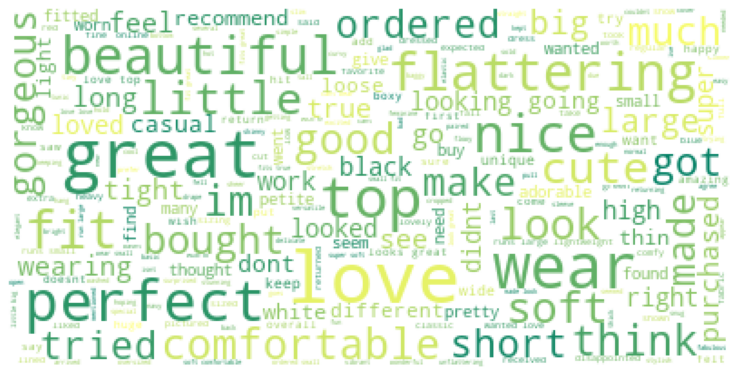

In [36]:
# Positive reviews wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#**Negative Reviews wordcloud**

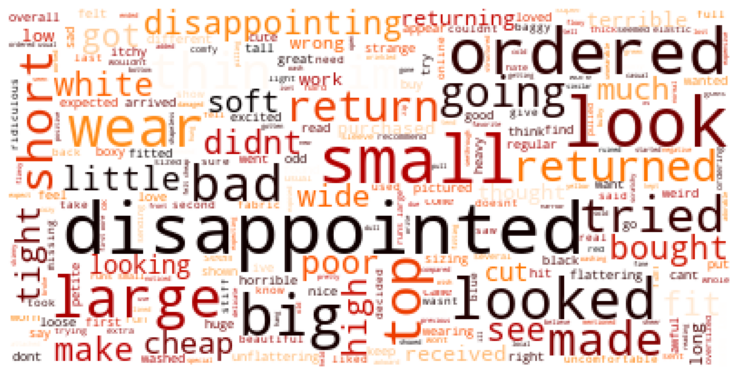

In [37]:
#Negative reviews wordcloud
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud

<!-- ## **Neutral Reviews wordcloud** -->

In [38]:
# wordcloud = WordCloud().generate(neu_words)

# wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
#                       max_font_size=40, relative_scaling=.5).generate(neg_words)
# plt.figure(figsize=(13,13))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()
# wordcloud

## **Model training and Testing for Label (sentiment) generation**

In [39]:
#Loading dataframe for model training and testing
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive,1
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive,1
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...,0.8779,0.735,0.038,0.227,Positive,1
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.9604,0.192,0.152,0.656,Positive,1
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...,0.9274,0.471,0.000,0.529,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,Great dress for many occasions I was very happ...,5,1,0,General Petite,Dresses,Dresses,162,"[great, dress, many, occasions, happy, snag, d...",great dress many occasions happy snag dress gr...,0.9432,0.319,0.074,0.606,Positive,1
23482,862,48,Wish it was made of cotton,Wish it was made of cotton It reminds me of ma...,3,1,0,General Petite,Tops,Knits,250,"[wish, made, cotton, reminds, maternity, cloth...",wish made cotton reminds maternity clothes sof...,0.7906,0.581,0.108,0.311,Positive,1
23483,1104,31,"Cute, but see through","Cute, but see through This fit well, but the t...",3,0,1,General Petite,Dresses,Dresses,230,"[cute, see, fit, well, top, see, never, would,...",cute see fit well top see never would worked g...,0.8756,0.449,0.086,0.466,Positive,1
23484,1084,28,"Very cute dress, perfect for summer parties an...","Very cute dress, perfect for summer parties an...",3,1,2,General,Dresses,Dresses,478,"[cute, dress, perfect, summer, parties, bought...",cute dress perfect summer parties bought dress...,0.9744,0.519,0.039,0.442,Positive,1


In [40]:
# Function to clean the training text
def preProcessing(review):
    text = review.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    text = RegexpTokenizer(r'\w+').tokenize(str(text))
    text = [x for x in text if x not in stopwords.words('english')]
    text = [t for t in text if len(t) > 0]
    review_clean = " ".join(text)
    return(review_clean)

In [41]:
#Created new column for cleaned text with name "Review Clean"
df['Review Clean'] = df['Review Text'].apply(lambda x: preProcessing(x))

In [60]:
df.to_csv("Generated_csv.csv")
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label,Review Clean
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive,1,absolutely wonderful silky sexy comfortable
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive,1,love dress sooo pretty happened find store gla...
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...,0.8779,0.735,0.038,0.227,Positive,1,major design flaws high hopes dress really wan...
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.9604,0.192,0.152,0.656,Positive,1,favorite buy love love love jumpsuit fun flirt...
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...,0.9274,0.471,0.000,0.529,Positive,1,flattering shirt shirt flattering due adjustab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,Great dress for many occasions I was very happ...,5,1,0,General Petite,Dresses,Dresses,162,"[great, dress, many, occasions, happy, snag, d...",great dress many occasions happy snag dress gr...,0.9432,0.319,0.074,0.606,Positive,1,great dress many occasions happy snag dress gr...
23482,862,48,Wish it was made of cotton,Wish it was made of cotton It reminds me of ma...,3,1,0,General Petite,Tops,Knits,250,"[wish, made, cotton, reminds, maternity, cloth...",wish made cotton reminds maternity clothes sof...,0.7906,0.581,0.108,0.311,Positive,1,wish made cotton reminds maternity clothes sof...
23483,1104,31,"Cute, but see through","Cute, but see through This fit well, but the t...",3,0,1,General Petite,Dresses,Dresses,230,"[cute, see, fit, well, top, see, never, would,...",cute see fit well top see never would worked g...,0.8756,0.449,0.086,0.466,Positive,1,cute see fit well top see never would worked g...
23484,1084,28,"Very cute dress, perfect for summer parties an...","Very cute dress, perfect for summer parties an...",3,1,2,General,Dresses,Dresses,478,"[cute, dress, perfect, summer, parties, bought...",cute dress perfect summer parties bought dress...,0.9744,0.519,0.039,0.442,Positive,1,cute dress perfect summer parties bought dress...


In [43]:
#Importing CountVectorizer
vectorizer = CountVectorizer()

In [44]:
#importing SMOTE from imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()


In [53]:
#Passing input for Enconding
X = vectorizer.fit_transform(df['Review Clean'])
y = df['label']
X_smt, y_smt = oversample.fit_resample(X, y)

#Splitting training and testing data with ratio of 0.7 and 0.3
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=100)

In [54]:
#Loading Models
logisticRegression = LogisticRegression()
naiveBayes = MultinomialNB()
SVM = SVC()
randomForest = RandomForestClassifier(n_estimators=50)
neuralNetwork = MLPClassifier()
models = [logisticRegression, naiveBayes, SVM, randomForest, neuralNetwork]

### **Traing modles ,Saving models and Testing Modles**

In [55]:

conf_matrix = []
acc = []
reports = []

# For each model we are going to fit the model with the x_train and y_train.
for model in models:
    save_model=str(model)
    print()
    model.fit(X_train, y_train)
    with open(save_model+'.pkl','wb') as f:
      pickle.dump(model,f)

    
    # Predict 
    predictions = model.predict(X_test)
    
    # Get the accuracy of the predictions that the model has made.
    accuracy = round(accuracy_score(y_test, predictions)*100)
    
    # Save the confusion_matrix for each model
    model_cm = confusion_matrix(y_test.values, predictions)
    
    # Save the classification_report for each model
    report = classification_report(y_test, predictions)
    
    conf_matrix.append(model_cm)
    acc.append(accuracy)
    reports.append(report)

In [56]:
#Accuracy of Each Model
from prettytable import PrettyTable

model_accuracy = PrettyTable()

model_accuracy.add_column("Model", ['Logistic Regresion', 'Naive Bayes', 'SVM', 'Random Forest', 'Neural Network'])
model_accuracy.add_column("Accuracy", acc)
print(model_accuracy)

+--------------------+----------+
|       Model        | Accuracy |
+--------------------+----------+
| Logistic Regresion |    98    |
|    Naive Bayes     |    95    |
|        SVM         |    99    |
|   Random Forest    |    99    |
|   Neural Network   |    99    |
+--------------------+----------+


In [57]:
# Loading trained model and its score by passing testing data
with open('SVC().pkl', 'rb') as f:
    loaded_model = pickle.load(f)
result = loaded_model.score(X_test, y_test)
result

0.9859550561797753

In [58]:
#Confusion Matrix for all models
def plot_confusionMatrix(conf_matrix):
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.title("Logistic Regression Confusion Matrix")
    sns.heatmap(conf_matrix[0], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.title("Naive Bayes Confusion Matrix")
    sns.heatmap(conf_matrix[1], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    plt.title("SVM Confusion Matrix")
    sns.heatmap(conf_matrix[2], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

    plt.figure(figsize=(15,12))   
    plt.subplot(2,2,1)
    plt.title("Random Forest Confusion Matrix")
    sns.heatmap(conf_matrix[3], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

    plt.figure(figsize=(15,12))   
    plt.subplot(2,2,2)
    plt.title("Neural Network Confusion Matrix")
    sns.heatmap(conf_matrix[4], annot = True, cmap="OrRd", fmt='.0f',cbar=False);
    
    plt.show() 

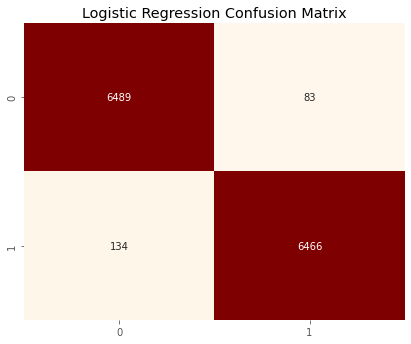

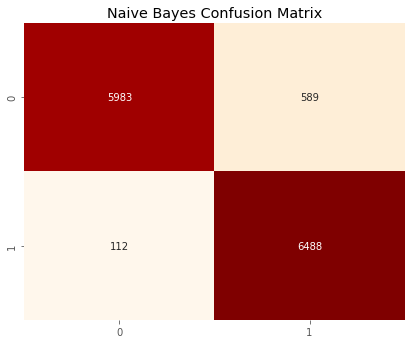

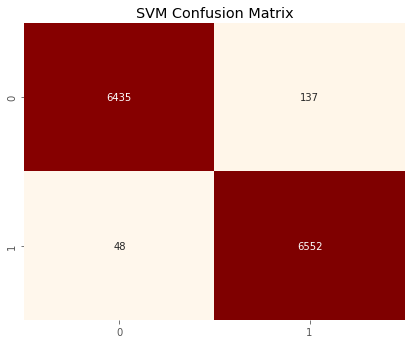

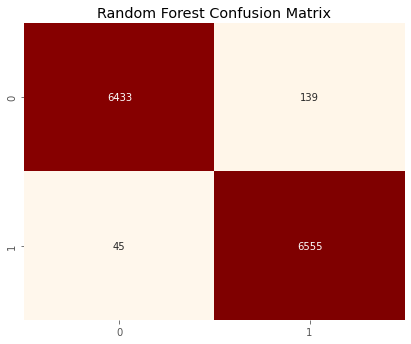

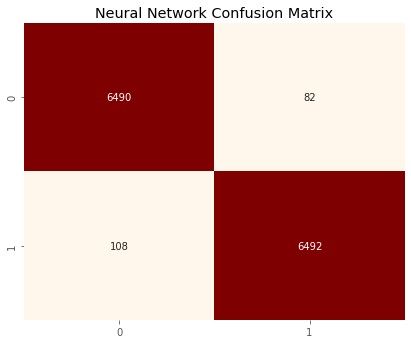

In [59]:
plot_confusionMatrix(conf_matrix)

# **Conclusion**
We can use the SVM model for Automatic labels generation with which we got the better accuracy.